In [1]:
# importing relevant libraries
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D,Dropout
import numpy as np
import keras

In [2]:
# Load the dataset
X = np.loadtxt('input.csv', delimiter=',')
Y = np.loadtxt('labels.csv', delimiter=',')

# Reshape the data
X = X.reshape(len(X), 100, 100, 3)
Y = Y.reshape(len(Y), 1)

# Normalize the values
X = X / 255.0

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


In [3]:
X_train

array([[[[0.10980392, 0.11372549, 0.08235294],
         [0.09803922, 0.10196078, 0.07058824],
         [0.09019608, 0.09019608, 0.05882353],
         ...,
         [0.08627451, 0.08627451, 0.07843137],
         [0.08235294, 0.08235294, 0.0745098 ],
         [0.08235294, 0.08235294, 0.0745098 ]],

        [[0.11372549, 0.11764706, 0.08627451],
         [0.10588235, 0.10980392, 0.07843137],
         [0.10196078, 0.10196078, 0.07058824],
         ...,
         [0.08627451, 0.08627451, 0.07843137],
         [0.08235294, 0.08235294, 0.0745098 ],
         [0.08235294, 0.08235294, 0.0745098 ]],

        [[0.11372549, 0.11764706, 0.09411765],
         [0.10980392, 0.11372549, 0.09019608],
         [0.10980392, 0.10588235, 0.08627451],
         ...,
         [0.08235294, 0.08235294, 0.0745098 ],
         [0.08235294, 0.08235294, 0.0745098 ],
         [0.08235294, 0.08235294, 0.0745098 ]],

        ...,

        [[0.38039216, 0.14117647, 0.01960784],
         [0.37647059, 0.1372549 , 0.02352941]

In [4]:
# Load the test data
X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
X_test = X_test / 255.0

In [5]:
print("X_train shape : ", X_train.shape)
print("Y_train shape : ", Y_train.shape)

print("X_test shape : ", X_test.shape)
print("Y_test shape : ", Y_test.shape)

X_train shape :  (1600, 100, 100, 3)
Y_train shape :  (1600, 1)
X_test shape :  (400, 100, 100, 3)
Y_test shape :  (400, 1)


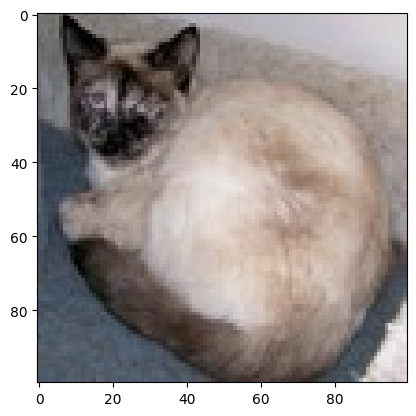

CAT 1


In [6]:
index=random.randint(0,len(X_train)-1)
plt.imshow(X_train[index,:])
plt.show()
if Y_train[index]:
    print('CAT', int(Y_train[index][0]))
else:
    print('DOG', int(Y_train[index][0]))
# Y_train

In [7]:
def Loss_compute(y_true, y_pred, label_smoothing=0.1):
    loss = keras.losses.SparseCategoricalCrossentropy()(label_smoothing=label_smoothing)(y_true, y_pred)
    return loss

In [8]:
# cnn model1 (binary)

model1 = Sequential([
    AveragePooling2D(6,(3,3),input_shape=(100,100,3)),
    
    Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64,(3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(128,(3,3), activation='relu', input_shape=(100,100,3)),
#     MaxPooling2D((2,2)),
    
    Dropout(0.25),
    
    Flatten(),
#     Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
    
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (AverageP  (None, 32, 32, 3)        0         
 ooling2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                        

In [9]:
model1.compile(loss=keras.losses.BinaryCrossentropy(),optimizer='adam',metrics=['accuracy'])
history1 = model1.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_val, Y_val))
model1.evaluate(X_test,Y_test)

Epoch 1/20
50/50 [==============================] - 3s 38ms/step - loss: 0.6967 - accuracy: 0.5000 - val_loss: 0.6916 - val_accuracy: 0.5775
Epoch 2/20
50/50 [==============================] - 2s 34ms/step - loss: 0.6889 - accuracy: 0.5369 - val_loss: 0.6869 - val_accuracy: 0.5200
Epoch 3/20
50/50 [==============================] - 2s 34ms/step - loss: 0.6687 - accuracy: 0.6050 - val_loss: 0.6677 - val_accuracy: 0.5825
Epoch 4/20
50/50 [==============================] - 2s 35ms/step - loss: 0.6206 - accuracy: 0.6544 - val_loss: 0.6607 - val_accuracy: 0.6250
Epoch 5/20
50/50 [==============================] - 2s 34ms/step - loss: 0.6122 - accuracy: 0.6706 - val_loss: 0.6551 - val_accuracy: 0.6350
Epoch 6/20
50/50 [==============================] - 2s 35ms/step - loss: 0.5905 - accuracy: 0.6881 - val_loss: 0.6337 - val_accuracy: 0.6550
Epoch 7/20
50/50 [==============================] - 2s 35ms/step - loss: 0.5572 - accuracy: 0.7294 - val_loss: 0.6390 - val_accuracy: 0.6650
Epoch 8/20
50

[0.9100437760353088, 0.6924999952316284]

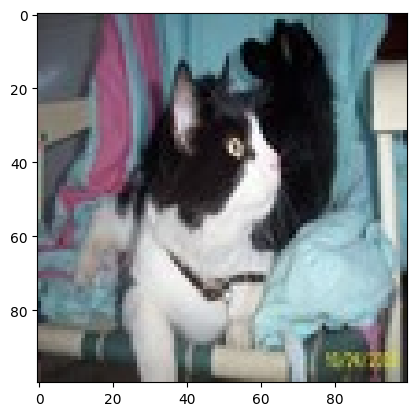

1/1 [==============================] - 0s 8ms/step
actual :  1
predicted :  1
---


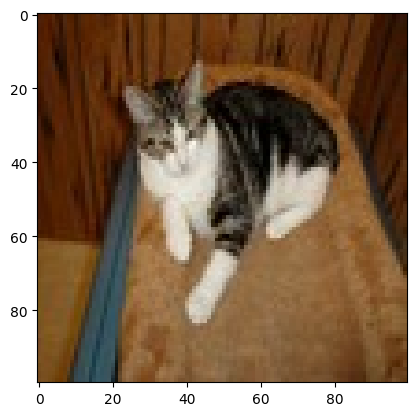

1/1 [==============================] - 0s 24ms/step
actual :  1
predicted :  1
---


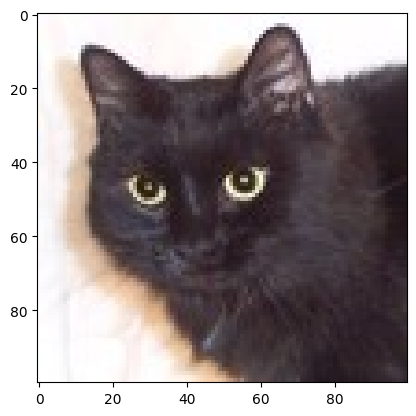

1/1 [==============================] - 0s 16ms/step
actual :  1
predicted :  1
---


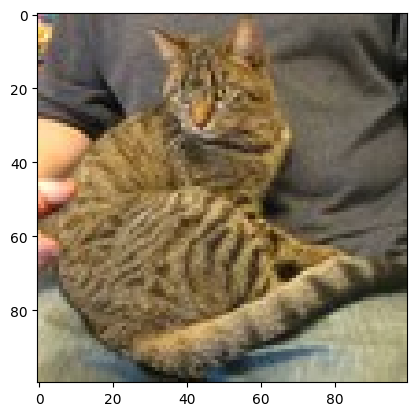

1/1 [==============================] - 0s 24ms/step
actual :  1
predicted :  0
---


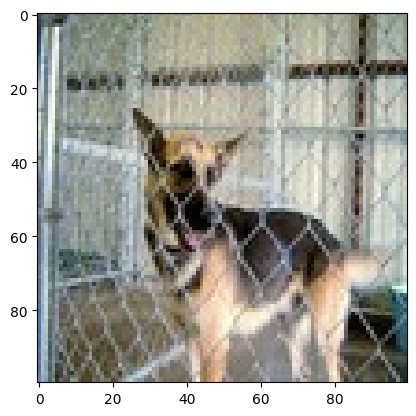

1/1 [==============================] - 0s 8ms/step
actual :  0
predicted :  0
---


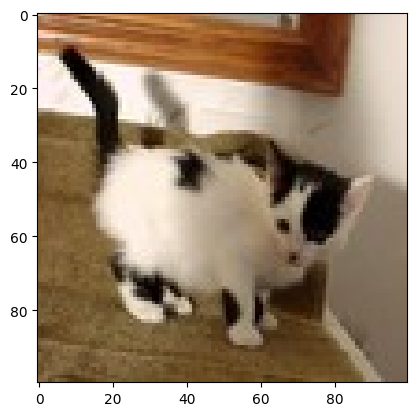

1/1 [==============================] - 0s 8ms/step
actual :  1
predicted :  0
---


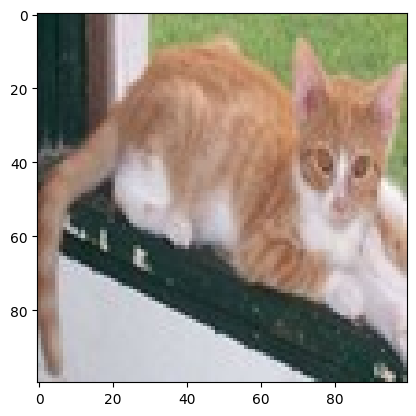

1/1 [==============================] - 0s 24ms/step
actual :  1
predicted :  1
---


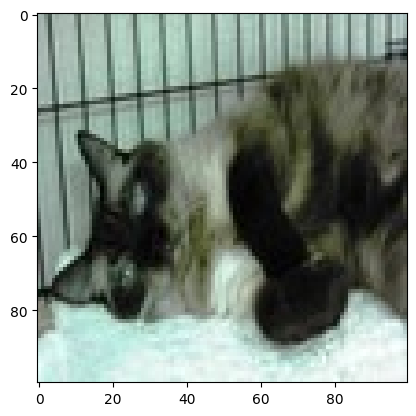

1/1 [==============================] - 0s 24ms/step
actual :  1
predicted :  1
---


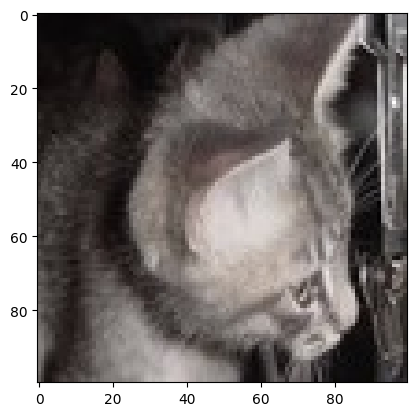

1/1 [==============================] - 0s 27ms/step
actual :  1
predicted :  1
---


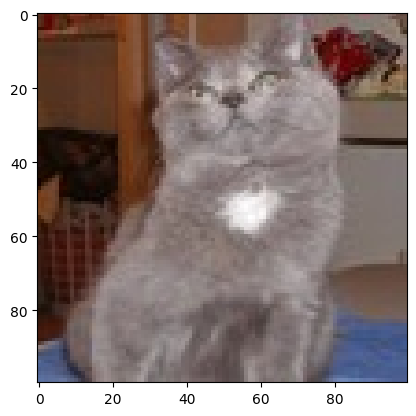

1/1 [==============================] - 0s 26ms/step
actual :  1
predicted :  1
---


In [36]:
# prediction 10 random images from test data

for _ in range(10):
    index = random.randint(0, len(Y_test) - 1)
    
    plt.imshow(X_test[index, :])
    plt.show()

    y_pred = model1.predict(X_test[index, :].reshape(1, 100, 100, 3))

    print('actual : ', int(Y_test[index][0]))
    if(y_pred[0][0]>0.5):
        print('predicted : ',1)
    else:
        print('predicted : ',0)
    print('---')

In [30]:
# cnn model2 (cetagorical)

model2 = Sequential([
    AveragePooling2D(6,(3,3),input_shape=(100,100,3)),
    
    Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64,(3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(128,(3,3), activation='relu', input_shape=(100,100,3)),
#     MaxPooling2D((2,2)),
    
    Dropout(0.5),
    
    Flatten(),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(2,activation='softmax')
    
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d_1 (Averag  (None, 32, 32, 3)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

In [31]:
model2.compile(loss=keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
history2 = model2.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_val, Y_val))
model2.evaluate(X_test,Y_test)

Epoch 1/20
25/25 [==============================] - 2s 61ms/step - loss: 0.6981 - accuracy: 0.4981 - val_loss: 0.6928 - val_accuracy: 0.5025
Epoch 2/20
25/25 [==============================] - 1s 53ms/step - loss: 0.6940 - accuracy: 0.4969 - val_loss: 0.6927 - val_accuracy: 0.4975
Epoch 3/20
25/25 [==============================] - 1s 54ms/step - loss: 0.6925 - accuracy: 0.5238 - val_loss: 0.6884 - val_accuracy: 0.5450
Epoch 4/20
25/25 [==============================] - 1s 53ms/step - loss: 0.6845 - accuracy: 0.5562 - val_loss: 0.6826 - val_accuracy: 0.5500
Epoch 5/20
25/25 [==============================] - 1s 52ms/step - loss: 0.6696 - accuracy: 0.5962 - val_loss: 0.6767 - val_accuracy: 0.5675
Epoch 6/20
25/25 [==============================] - 1s 49ms/step - loss: 0.6388 - accuracy: 0.6388 - val_loss: 0.6592 - val_accuracy: 0.6175
Epoch 7/20
25/25 [==============================] - 1s 49ms/step - loss: 0.6513 - accuracy: 0.6225 - val_loss: 0.6587 - val_accuracy: 0.5925
Epoch 8/20
25

[0.7388498187065125, 0.6775000095367432]

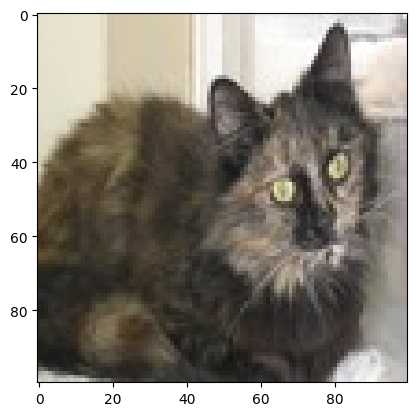

1/1 [==============================] - 0s 61ms/step
actual :  1
predicted :  0
---


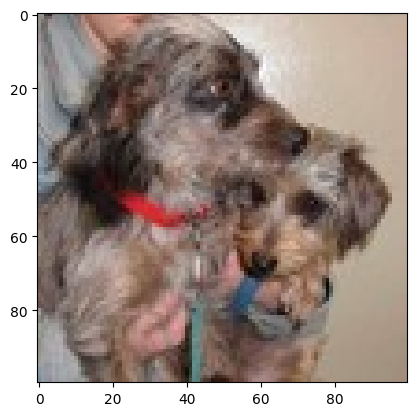

1/1 [==============================] - 0s 13ms/step
actual :  0
predicted :  1
---


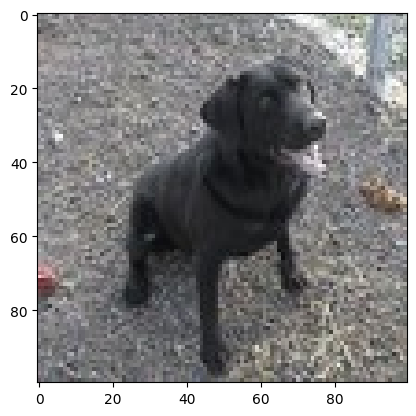

1/1 [==============================] - 0s 16ms/step
actual :  0
predicted :  1
---


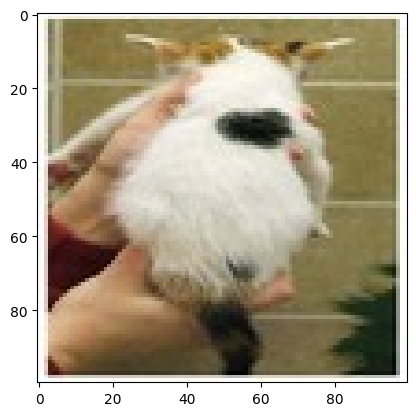

1/1 [==============================] - 0s 16ms/step
actual :  1
predicted :  1
---


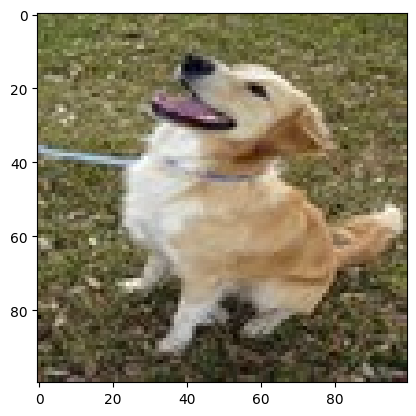

1/1 [==============================] - 0s 16ms/step
actual :  0
predicted :  1
---


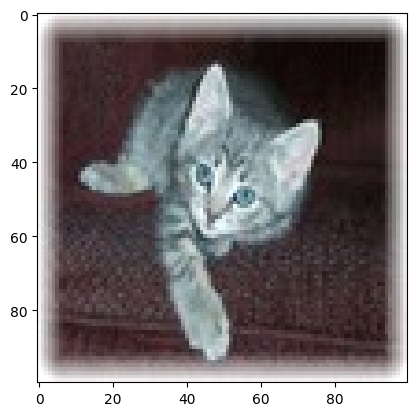

1/1 [==============================] - 0s 28ms/step
actual :  1
predicted :  0
---


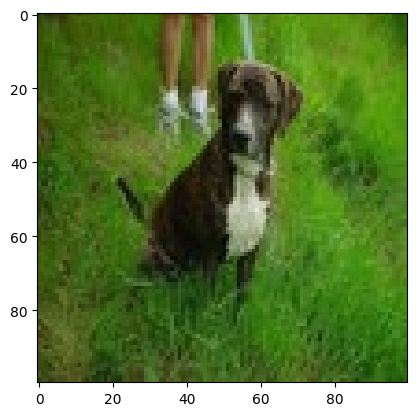

1/1 [==============================] - 0s 36ms/step
actual :  0
predicted :  1
---


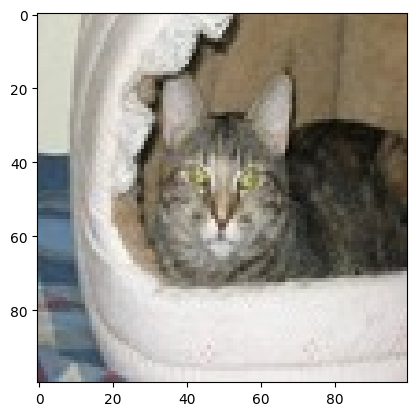

1/1 [==============================] - 0s 24ms/step
actual :  1
predicted :  0
---


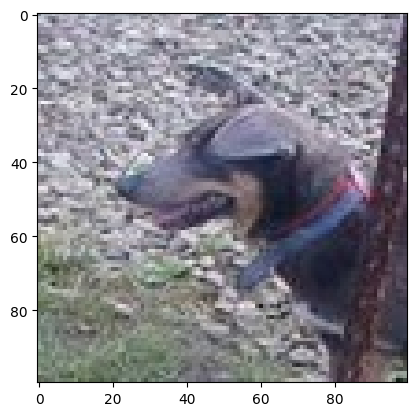

1/1 [==============================] - 0s 24ms/step
actual :  0
predicted :  1
---


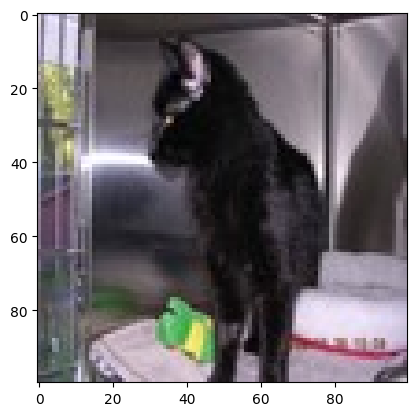

1/1 [==============================] - 0s 24ms/step
actual :  1
predicted :  0
---


In [37]:
# prediction 10 random images from test data

for _ in range(10):
    index = random.randint(0, len(Y_test) - 1)
    
    plt.imshow(X_test[index, :])
    plt.show()

    y_pred = model2.predict(X_test[index, :].reshape(1, 100, 100, 3))

    print('actual : ', int(Y_test[index][0]))
    if(y_pred[0][0]>0.5):
        print('predicted : ',1)
    else:
        print('predicted : ',0)
    print('---')